In [1]:
import pandas as pd
data = pd.read_csv('ner_dataset.csv', encoding = 'unicode_escape')
data.head(10)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


Using TensorFlow backend.


hej
                      Sentence Intent
0          What does that cost  price
1  What's the price of <Item>?  price
2          How much is <item>?  price
3              Cost of <Item>?  price
4       What does <Item> cost?  price
['What does that cost', "What's the price of <Item>?", 'How much is <item>?', 'Cost of <Item>?', 'What does <Item> cost?']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/axelalvarsson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/axelalvarsson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/axelalvarsson/opt/anaconda3/envs/nnlm/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


42
[['what', 'does', 'that', 'cost'], ['what', 's', 'the', 'price', 'of', 'item']]
Vocab Size = 47 and Maximum length = 6
Shape of padded docs =  (42, 6)
Shape of train_X = (33, 6) and train_Y = (33, 4)
Shape of val_X = (9, 6) and val_Y = (9, 4)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 6, 128)            6016      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total 

Epoch 33/100
33/33 [==============================] - 0s 6ms/step - loss: 1.0821 - accuracy: 0.5758 - val_loss: 1.2463 - val_accuracy: 0.4444

Epoch 00033: val_loss improved from 1.25705 to 1.24630, saving model to model.h5
Epoch 34/100
33/33 [==============================] - 0s 3ms/step - loss: 1.0635 - accuracy: 0.5455 - val_loss: 1.2430 - val_accuracy: 0.3333

Epoch 00034: val_loss improved from 1.24630 to 1.24302, saving model to model.h5
Epoch 35/100
33/33 [==============================] - 0s 2ms/step - loss: 1.0441 - accuracy: 0.4545 - val_loss: 1.2361 - val_accuracy: 0.3333

Epoch 00035: val_loss improved from 1.24302 to 1.23614, saving model to model.h5
Epoch 36/100
33/33 [==============================] - 0s 3ms/step - loss: 1.0586 - accuracy: 0.4545 - val_loss: 1.1946 - val_accuracy: 0.4444

Epoch 00036: val_loss improved from 1.23614 to 1.19457, saving model to model.h5
Epoch 37/100
33/33 [==============================] - 0s 3ms/step - loss: 0.9100 - accuracy: 0.5758 - va

33/33 [==============================] - 0s 4ms/step - loss: 0.5075 - accuracy: 0.8182 - val_loss: 0.7252 - val_accuracy: 0.7778

Epoch 00071: val_loss improved from 0.74201 to 0.72521, saving model to model.h5
Epoch 72/100
33/33 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.8485 - val_loss: 0.7092 - val_accuracy: 0.6667

Epoch 00072: val_loss improved from 0.72521 to 0.70920, saving model to model.h5
Epoch 73/100
33/33 [==============================] - 0s 5ms/step - loss: 0.4908 - accuracy: 0.8485 - val_loss: 0.6907 - val_accuracy: 0.7778

Epoch 00073: val_loss improved from 0.70920 to 0.69067, saving model to model.h5
Epoch 74/100
33/33 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.8182 - val_loss: 0.6786 - val_accuracy: 0.7778

Epoch 00074: val_loss improved from 0.69067 to 0.67865, saving model to model.h5
Epoch 75/100
33/33 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.8788 - val_loss: 0.692

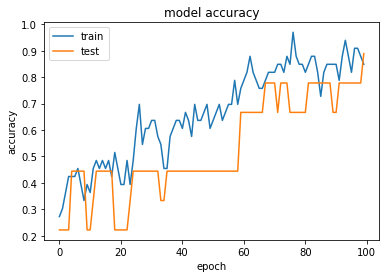

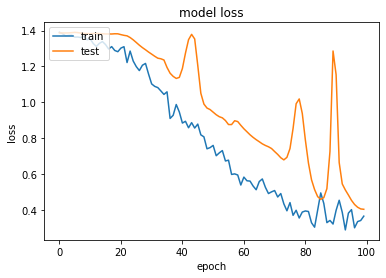

['how', 'much', 'does', 'it', 'cost']
price has confidence = 0.5186482
balance has confidence = 0.27704015
common has confidence = 0.14255796
order has confidence = 0.061753694
Whats on your mind today?


KeyboardInterrupt: Interrupted by user

KeyboardInterrupt: Interrupted by user

In [3]:
%run chatbot_keras.ipynb

In [2]:
from itertools import chain
def get_dict_map(data, token_or_tag):
    tok2idx = {}
    idx2tok = {}
    
    if token_or_tag == 'token':
        vocab = list(set(data['Word'].to_list()))
    else:
        vocab = list(set(data['Tag'].to_list()))
    
    idx2tok = {idx:tok for  idx, tok in enumerate(vocab)}
    tok2idx = {tok:idx for  idx, tok in enumerate(vocab)}
    return tok2idx, idx2tok


token2idx, idx2token = get_dict_map(data, 'token')
tag2idx, idx2tag = get_dict_map(data, 'tag')

In [3]:
data['Word_idx'] = data['Word'].map(token2idx)
data['Tag_idx'] = data['Tag'].map(tag2idx)
data.head()

,Sentence #,Word,POS,Tag,Word_idx,Tag_idx
0,Sentence: 1,Thousands,NNS,O,9494,8
1,NaN,of,IN,O,15554,8
2,NaN,demonstrators,NNS,O,29559,8
3,NaN,have,VBP,O,9398,8
4,NaN,marched,VBN,O,32286,8


In [4]:
# Fill na
data_fillna = data.fillna(method='ffill', axis=0)
# Groupby and collect columns
data_group = data_fillna.groupby(
['Sentence #'],as_index=False
)['Word', 'POS', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))
# Visualise data
data_group.head()

/Users/maxlengdell/opt/anaconda3/envs/nnD7046E/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Sentence #,Word,POS,Tag,Word_idx,Tag_idx
0,Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[9494, 15554, 29559, 9398, 32286, 18783, 505, ...","[8, 8, 8, 8, 8, 8, 16, 8, 8, 8, 8, 8, 16, 8, 8..."
1,Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[JJ, NNS, VBP, PRP, VBP, TO, VB, NN, TO, JJ, J...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[22589, 6617, 20305, 18273, 8283, 22008, 32944...","[3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ..."
2,Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[NN, NNS, NNP, VBD, JJ, NNS, IN, DT, NNP, JJ, ...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...","[9875, 32905, 8570, 4174, 22420, 30125, 23886,...","[8, 8, 14, 8, 8, 8, 8, 8, 16, 8, 8, 8, 8, 8, 1..."
3,Sentence: 1000,"[They, left, after, a, tense, hour-long, stand...","[PRP, VBD, IN, DT, NN, JJ, NN, IN, NN, NNS, .]","[O, O, O, O, O, O, O, O, O, O, O]","[19835, 34225, 44, 2257, 27076, 29747, 11146, ...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]"
4,Sentence: 10000,"[U.N., relief, coordinator, Jan, Egeland, said...","[NNP, NN, NN, NNP, NNP, VBD, NNP, ,, NNP, ,, J...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...","[7259, 22147, 32451, 10928, 23167, 28647, 1880...","[16, 8, 8, 11, 2, 8, 14, 8, 16, 8, 3, 8, 3, 8,..."


In [5]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Using TensorFlow backend.
/Users/maxlengdell/opt/anaconda3/envs/nnD7046E/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/maxlengdell/opt/anaconda3/envs/nnD7046E/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/maxlengdell/opt/anaconda3/envs/nnD7046E/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16",

In [6]:
def get_pad_train_test_val(data_group, data):

    #get max token and tag length
    n_token = len(list(set(data['Word'].to_list())))
    n_tag = len(list(set(data['Tag'].to_list())))

    #Pad tokens (X var)    
    tokens = data_group['Word_idx'].tolist()
    maxlen = max([len(s) for s in tokens])
    pad_tokens = pad_sequences(tokens, maxlen=maxlen, dtype='int32', padding='post', value= n_token - 1)

    #Pad Tags (y var) and convert it into one hot encoding
    tags = data_group['Tag_idx'].tolist()
    pad_tags = pad_sequences(tags, maxlen=maxlen, dtype='int32', padding='post', value= tag2idx["O"])
    n_tags = len(tag2idx)
    pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]
    
    #Split train, test and validation set
    tokens_, test_tokens, tags_, test_tags = train_test_split(pad_tokens, pad_tags, test_size=0.1, train_size=0.9, random_state=2020)
    train_tokens, val_tokens, train_tags, val_tags = train_test_split(tokens_,tags_,test_size = 0.25,train_size =0.75, random_state=2020)

    print(
        'train_tokens length:', len(train_tokens),
        '\ntrain_tokens length:', len(train_tokens),
        '\ntest_tokens length:', len(test_tokens),
        '\ntest_tags:', len(test_tags),
        '\nval_tokens:', len(val_tokens),
        '\nval_tags:', len(val_tags),
    )
    
    return train_tokens, val_tokens, test_tokens, train_tags, val_tags, test_tags

train_tokens, val_tokens, test_tokens, train_tags, val_tags, test_tags = get_pad_train_test_val(data_group, data)

train_tokens length: 32372 
train_tokens length: 32372 
test_tokens length: 4796 
test_tags: 4796 
val_tokens: 10791 
val_tags: 10791


In [20]:
import numpy as np
import tensorflow
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.utils import plot_model
import re

In [8]:
from numpy.random import seed
seed(1)
#tensorflow.random.set_seed(2)

In [9]:
input_dim = len(list(set(data['Word'].to_list())))+1
output_dim = 64
input_length = max([len(s) for s in data_group['Word_idx'].tolist()])
n_tags = len(tag2idx)
print('input_dim: ', input_dim, '\noutput_dim: ', output_dim, '\ninput_length: ', input_length, '\nn_tags: ', n_tags)

input_dim:  35179 
output_dim:  64 
input_length:  104 
n_tags:  17


In [10]:
def get_bilstm_lstm_model():
    model = Sequential()

    # Add Embedding layer
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))

    # Add bidirectional LSTM
    model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))

    # Add LSTM
    model.add(LSTM(units=output_dim, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))

    # Add timeDistributed Layer
    model.add(TimeDistributed(Dense(n_tags, activation="relu")))

    #Optimiser 
    # adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    return model

In [11]:
def train_model(X, y, model, epochs):
    loss = list()
    for i in range(epochs):
        # fit model for one epoch on this sequence
        hist = model.fit(X, y, batch_size=1000, verbose=1, epochs=1, validation_split=0.2)
        loss.append(hist.history['loss'][0])
        
    return loss

In [16]:


results = pd.DataFrame()
model_bilstm_lstm = get_bilstm_lstm_model()
plot_model(model_bilstm_lstm)
results['with_add_lstm'] = train_model(train_tokens, np.array(train_tags), model_bilstm_lstm, 5)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 104, 64)           2251456   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 104, 128)          66048     
_________________________________________________________________
lstm_5 (LSTM)                (None, 104, 64)           49408     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 104, 17)           1105      
Total params: 2,368,017
Trainable params: 2,368,017
Non-trainable params: 0
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Train on 25897 samples, validate on 6475 samples
25897/25897 [==============================] - 58s 2ms/sample - loss: 0.8579 - acc: 0.9259 - val_loss: 0.31

In [23]:
def predictions(text):
    clean = re.sub(r'[^ a-z A-Z 0-9]', " ", text)
    test_word = word_tokenize(clean)
    test_word = [w.lower() for w in test_word]
    test_ls = word_tokenizer.texts_to_sequences(test_word)
    print(test_word)
    #Check for unknown words
    if [] in test_ls:
        test_ls = list(filter(None, test_ls))
    
    test_ls = np.array(test_ls).reshape(1, len(test_ls))
 
    x = padding_doc(test_ls, max_length)
  
    pred = model_bilstm_lstm.predict_proba(x)
  
  
    return pred


  

In [24]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer

print(predictions('hello My name is max'))

NameError: name 'word_tokenizer' is not defined

In [31]:



import spacy
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()

#displacy.render(text, style = 'ent', jupyter=True)
text = ('I want to buy tickets to the concert. Whats the price on that? 20 dollars. I live in Tokyo and have a apartment')
doc = nlp(text)

print(doc.ents)
for ent in doc.ents:
    
    print(ent.text, ent.start_char, ent.end_char, ent.label_)



(20 dollars, Tokyo)
20 dollars 63 73 MONEY
Tokyo 85 90 GPE


In [49]:
#import chatbot_keras.ipynb

In [50]:
def cli():
    while True:
        
        user_input = input("Ask the chatbot something: ")
        print(user_input)
        if(user_input=="quit"):
            break
        else:
            pred = nlp(user_input)
            displacy.render(pred, style = 'ent', jupyter=True)

        
cli()

Ask the chatbot something: Hello I am from space and my name is Max
Hello I am from space and my name is Max


Ask the chatbot something: I would like to buy a few shoes from you for 200 dollars
I would like to buy a few shoes from you for 200 dollars


Ask the chatbot something: clothes
clothes


/Users/maxlengdell/opt/anaconda3/envs/nnD7046E/lib/python3.6/site-packages/spacy/displacy/__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


Ask the chatbot something: I like books and does
I like books and does


Ask the chatbot something: quit
quit
